# In general, there are two or three places where the look of a chart can be controlled, each with a greater priority than the last.

1) Top Level Chart Config. At the top level of an Altair chart, you can specify configuration settings that will apply to every panel or layer in the chart.

2) Local Configuration Settings. The top-level settings can be over-ridden locally, by specifying local configuration

3) Encoding Values. If an encoding value is specified, it will take highest precedance, and override the other options.

In [2]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
import numpy as np
import pandas as pd
np.random.seed(42)

data = pd.DataFrame(np.random.randn(100, 2), columns=['x', 'y'])

# Example 1:Controlling Marker Properties

In [5]:
# To control the color of the markers in a scatter plot

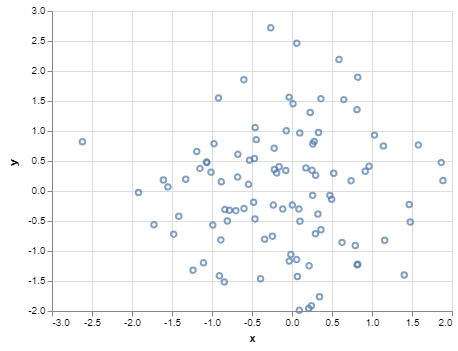

In [6]:
alt.Chart(data).mark_point().encode(
    x='x:Q',
    y='y:Q'
)

# Top-level configuration

In [8]:
# At the top level, Altair has a configure_mark() method that allows you to adjust a large number of configuration settings for marks in general, as well as a configure_point() property that specifically adjusts the properties of points.

# You can see the availale options in Jupyter in the documentation string, accessed with a question mark:

In [9]:
alt.Chart.configure_point?

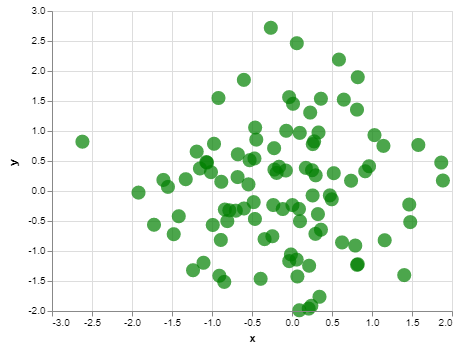

In [11]:
alt.Chart(data).mark_point().encode(
    x='x:Q',
    y='y:Q'
).configure_point(
    size=200,
    color='green',
    filled=True
)

In [12]:
# alt.Chart.configure_ and  tab to get auto completion and know more

# Local Mark Configuration

In [16]:
# Within the mark_point() method, you can pass local configurations that will override the top-level configuration settings.
# The arguments are the same as that of configure_mark.

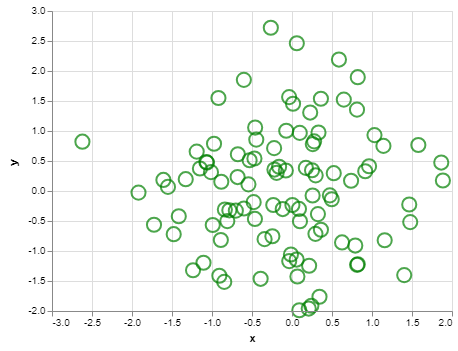

In [18]:
alt.Chart(data).mark_point(color='green', filled=False).encode(
    x='x:Q',
    y='y:Q'
).configure_point(
    size=200,
    color='red',
    filled=True
)

# Notice here that the "color" and "fill" configurations are overridden 
# by the local configurations, but the "size" remains the same as before.

# Encoding Configuration

In [20]:
# Finally, the highest precedence setting is the "encoding" setting. Here let's set the color to "steelblue" within the encoding:

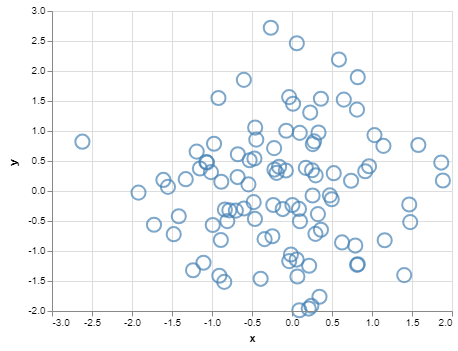

In [21]:
alt.Chart(data).mark_point(color='green', filled=False).encode(
    x='x:Q',
    y='y:Q',
    color=alt.value('steelblue')
).configure_point(
    size=200,
    color='red',
    filled=True
)

# Example 2: Chart and Axis Titles

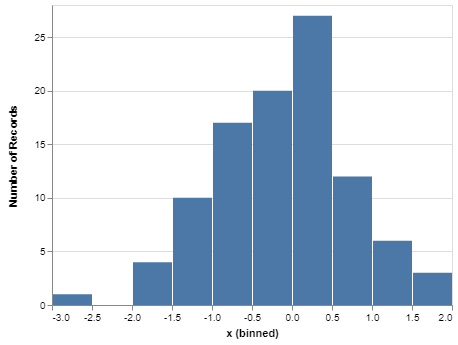

In [23]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True),
    y=alt.Y('count()')
)

In [24]:
# set the axis titles using the title argument to the encoding

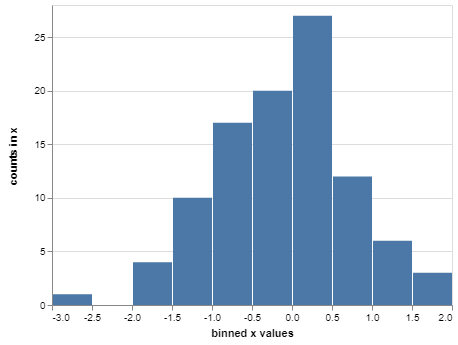

In [25]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True, title='binned x values'),
    y=alt.Y('count()', title='counts in x')
)

In [26]:
# set the title property of the chart within the chart properties

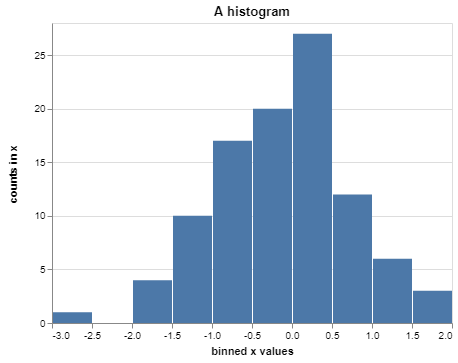

In [27]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True, title='binned x values'),
    y=alt.Y('count()', title='counts in x')
).properties(
    title='A histogram'
)

# Example 3: Axis Properties

In [29]:
# Chart and axis titles are set automatically based on the data source, but sometimes it is useful to change them.

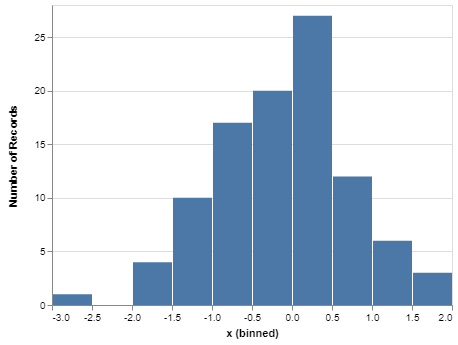

In [30]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True),
    y=alt.Y('count()')
)

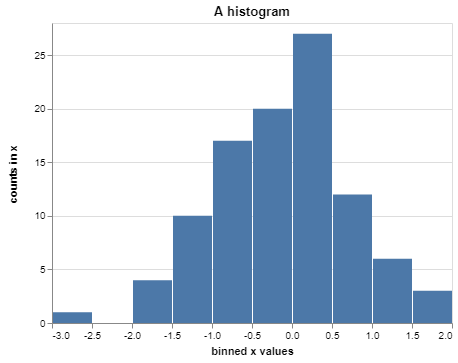

In [34]:
# We can explicitly set the axis titles using the title argument to the encoding and the title of the Chart
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True, title='binned x values'),
    y=alt.Y('count()', title='counts in x')
).properties(
    title='A histogram'
)

# Example 3: Axis Properties

In [36]:
# you may want  to set the properties of the axes, including grid lines, you can use the encodings'axis argument.

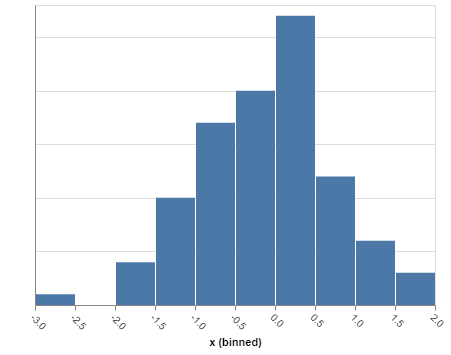

In [39]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True, axis=alt.Axis(labelAngle=45)),
    y=alt.Y('count()', axis=alt.Axis(labels=False, ticks=False, title=None))
)

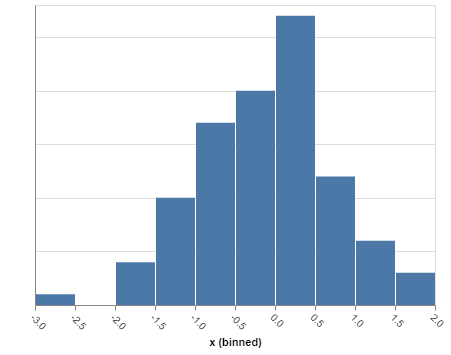

In [43]:
# How to do the same using top-level configuration
alt.Chart(data).mark_bar().encode(
    x=alt.X('x', bin=True),
    y=alt.Y('count()', axis=alt.Axis(labels=False, ticks=False, title=None))
).configure_axisX(
    labelAngle=45
)
# top-level configuration is configure_axisX(
#     labelAngle=45)

# Example 4: Scale properties & axis limits

In [61]:
# Each encoding also has a scale that allows you to adjust things like axis limits and other scale properties.

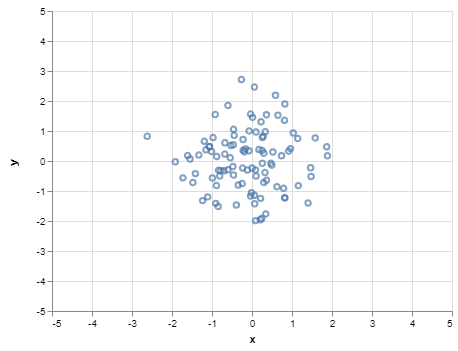

In [44]:
alt.Chart(data).mark_point().encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-5, 5])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-5, 5])),
)

In [62]:
# Note that if you shrink the scale to smaller than the range of the data, the data will extend beyond the scale by default:

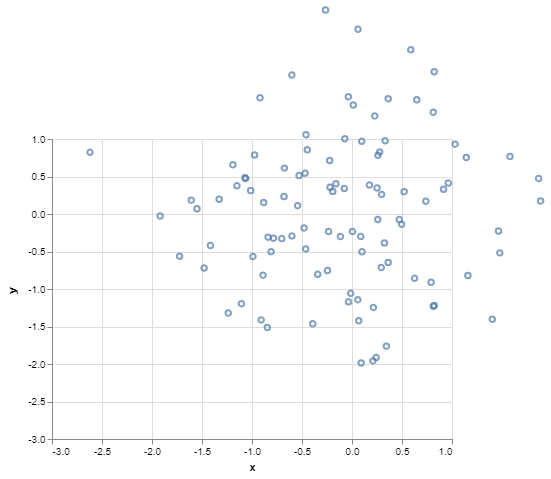

In [48]:
alt.Chart(data).mark_point().encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-3, 1])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-3, 1])),
)

In [63]:
# If you would like the markers to be clipped beyond the range of the scales, you can set the clip property of marks:

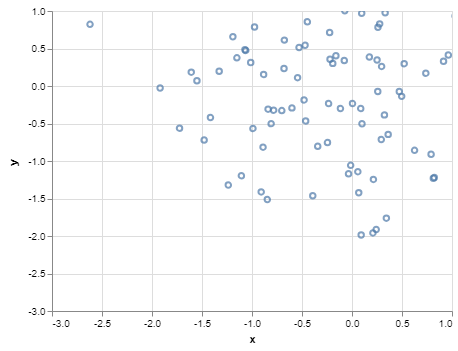

In [47]:
alt.Chart(data).mark_point(clip=True).encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-3, 1])),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-3, 1])),
)

In [65]:
# Another useful approach is to instead "clamp" the data to the extremes of the scale, keeping it visible even 
# when it is out of range

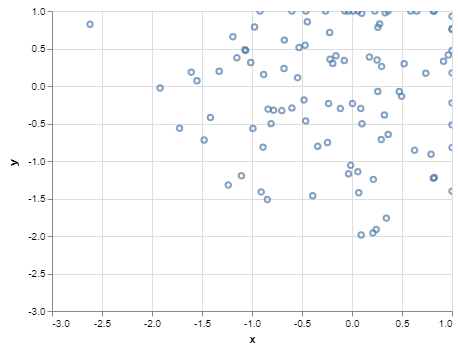

In [50]:
alt.Chart(data).mark_point().encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=[-3, 1], clamp=True)),
    y=alt.Y('y:Q', scale=alt.Scale(domain=[-3, 1], clamp=True)),
).interactive()

# Example 5: Color Scales

# Manually adjust a color scale used

In [52]:
from vega_datasets import data
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


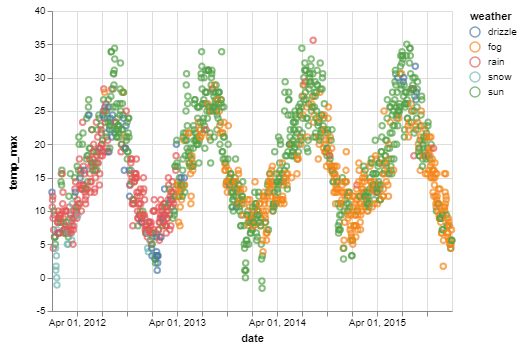

In [53]:
alt.Chart(weather).mark_point().encode(
    x='date:T',
    y='temp_max:Q',
    color='weather:N'
)

In [59]:
# You can change the color scheme by using the color scale property, and by referencing any of Vega's named color schemes:

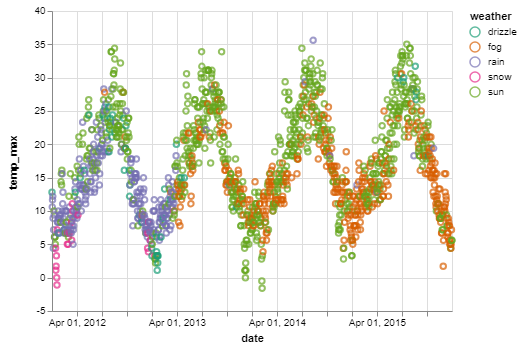

In [54]:
alt.Chart(weather).mark_point().encode(
    x='date:T',
    y='temp_max:Q',
    color=alt.Color('weather:N', scale=alt.Scale(scheme="dark2"))
)

In [58]:
# Change color manually by  specifying a color domain and range:

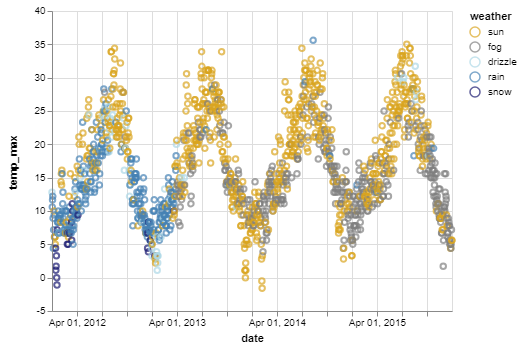

In [56]:
colorscale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                       range=['goldenrod', 'gray', 'lightblue', 'steelblue', 'midnightblue'])

alt.Chart(weather).mark_point().encode(
    x='date:T',
    y='temp_max:Q',
    color=alt.Color('weather:N', scale=colorscale)
)